In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


#using weather.csv 
data = pd.read_csv("weather.csv").iloc[0:100]
data = data.replace('Yes',1)
data = data.replace('No',0)
x = data.drop(['RainTomorrow','WindGustDir','WindDir9am','WindDir3pm'],axis=1)
y = data['RainTomorrow']

In [9]:
#preview of dataset
x[0:5]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0


In [2]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


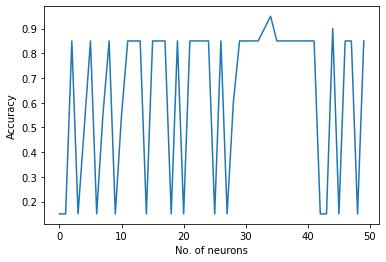

In [10]:
#number of layers
num = 50
acc = np.zeros(num)

for i in range(num):
    mlp = MLPClassifier(hidden_layer_sizes=(i+1),max_iter=1000)
    mlp.fit(x_train,y_train)
    test_pred = mlp.predict(x_test)
    acc[i] = accuracy_score(test_pred,y_test)

plt.xlabel("No. of neurons")
plt.ylabel("Accuracy")
plt.plot(acc)

In [11]:
n = np.argmax(acc)
print("No of neurons",n)

No of neurons 34


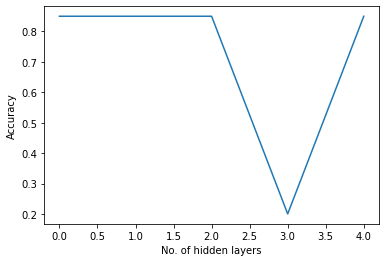

In [12]:
gr = np.zeros(5)

mlp = MLPClassifier(hidden_layer_sizes=(n),max_iter=1000)
mlp.fit(x_train,y_train)
test_pred = mlp.predict(x_test)
gr[0] = accuracy_score(test_pred,y_test)

mlp = MLPClassifier(hidden_layer_sizes=(n,n),max_iter=1000)
mlp.fit(x_train,y_train)
test_pred = mlp.predict(x_test)
gr[1] = accuracy_score(test_pred,y_test)
    
mlp = MLPClassifier(hidden_layer_sizes=(n,n,n),max_iter=1000)
mlp.fit(x_train,y_train)
test_pred = mlp.predict(x_test)
gr[2] = accuracy_score(test_pred,y_test)
    
mlp = MLPClassifier(hidden_layer_sizes=(n,n,n,n),max_iter=1000)
mlp.fit(x_train,y_train)
test_pred = mlp.predict(x_test)
gr[3] = accuracy_score(test_pred,y_test)
    
mlp = MLPClassifier(hidden_layer_sizes=(n,n,n,n,n),max_iter=1000)
mlp.fit(x_train,y_train)
test_pred = mlp.predict(x_test)
gr[4] = accuracy_score(test_pred,y_test)

plt.xlabel("No. of hidden layers")
plt.ylabel("Accuracy")
plt.plot(gr)